# Box Detection Challenge
### Import libraries

In [138]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import json
import os

### Read image, apply filters, bounding boxes generation

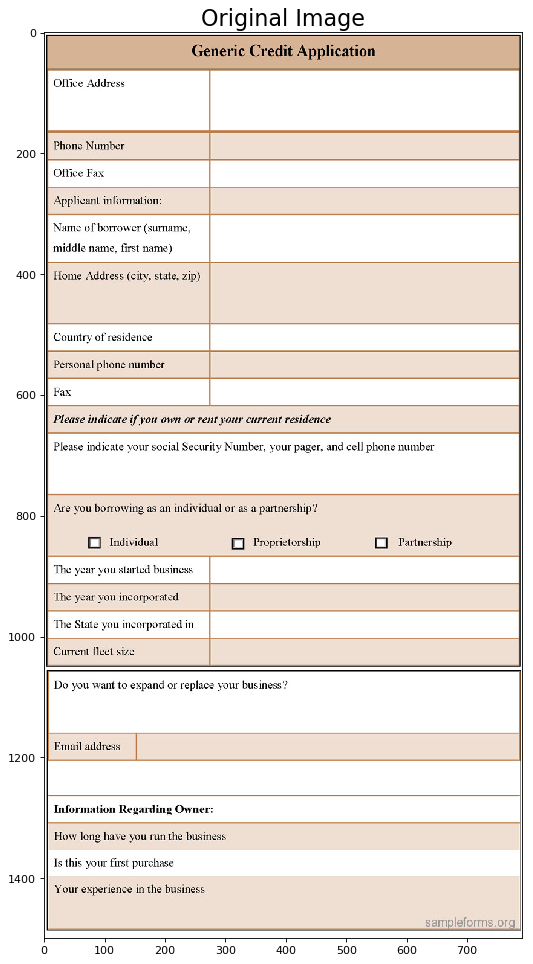

In [131]:
path = 'examples/inputs/credit_application.jpg'
img = cv2.imread(path)
cannyedge = cv2.Canny(img,100,100)
contours = cv2.findContours(cannyedge,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
idx =0 
boxes = []
for cnt in contours[1]:
    approx = cv2.approxPolyDP(cnt,0.01*cv2.arcLength(cnt,True),True)
    x,y,w,h = cv2.boundingRect(cnt)
    area = w*h
    if area>=1000:
        box = {'x1':x, 'x2':x+w, 'y1':y, 'y2':y+h, 'area':area}
        boxes.append(box)
plt.figure(num=None, figsize=(15, 15), dpi=80)
plt.title('Original Image', fontsize=20)
plt.imshow(img)
plt.show()  

### Filter ovelapping boxes

In [132]:
boxes.sort(key=lambda x:x['area'])
filtered_box_set = []
for box in boxes:
    if not box_set: 
        filtered_box_set.append(box)
    else:
        for box2 in filtered_box_set:
            iou = iou_fun(box, box2)
            if iou>=0.5:
                break
        else:
            filtered_box_set.append(box)

### Intersection over union function to evaluate overlapping of bounding boxes

In [88]:
def iou_fun(box1, box2):
    x_left = max(box1['x1'], box2['x1'])
    y_top = max(box1['y1'], box2['y1'])
    x_right = min(box1['x2'], box2['x2'])
    y_bottom = min(box1['y2'], box2['y2'])

    if x_right < x_left or y_bottom < y_top: return 0.0
    intersection = (x_right - x_left) * (y_bottom - y_top)
    iou = intersection / float(box1['area'] + box2['area'] - intersection)
    assert iou >= 0.0 and iou <= 1.0
    return iou

### Function to write JSON file

In [120]:
def writeJSON(path, filename, data):
    filepath = './' + path + filename + '.json'
    with open(filepath, 'w') as f:
        json.dump(data, f)

### Draw bounding boxes, generate JSON file and image output

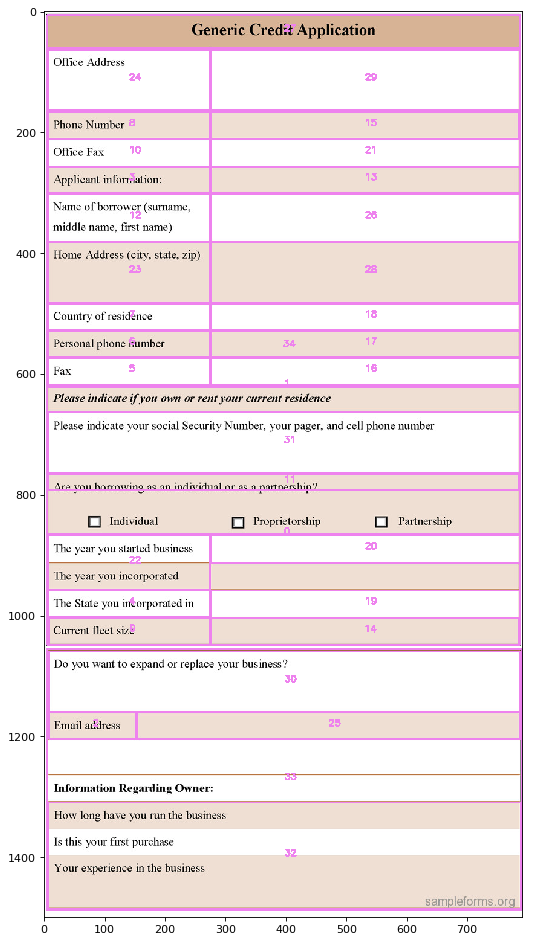

In [135]:
img = cv2.imread(path)
idx = 0
data = {'boxes':[]}
for box in filtered_box_set:
    cv2.rectangle(img,(box['x1'],box['y1']),(box['x2'],box['y2']),(238,130,238),2)
    cv2.putText(img, str(idx), ((box['x1']+box['x2'])//2,(box['y1']+box['y2'])//2), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (238,130,238),2)
    data['boxes'].append({'box_{}'.format(idx):box})
    idx += 1
plt.figure(num=None, figsize=(15, 15), dpi=80)
plt.imshow(img)
plt.show()  
cv2.imwrite("output.jpg", img)
writeJSON('./', "myout", data)

In [142]:
print(os.path.basename(path)[:-4])

credit_application
